## Pregunta 1: Uso de yfinance para extraer datos de Tesla

Usamos la biblioteca `yfinance` para extraer datos históricos de Tesla y mostramos las primeras cinco filas.


In [4]:
# Importar bibliotecas necesarias
import yfinance as yf
import pandas as pd

# Crear el objeto Ticker para Tesla
tesla = yf.Ticker("TSLA")

# Extraer datos históricos de Tesla con el periodo máximo
tesla_data = tesla.history(period="max")

# Restablecer el índice para facilitar la lectura
tesla_data.reset_index(inplace=True)

# Visualizar las primeras cinco filas del marco de datos
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Pregunta 2: Uso de yfinance para extraer datos de GameStop


Usamos la biblioteca `yfinance` para extraer datos históricos de GameStop (GME) y mostramos las primeras cinco filas del DataFrame.


In [5]:
# Crear el objeto Ticker para GameStop
gme = yf.Ticker("GME")

# Extraer datos históricos de GameStop con el periodo máximo
gme_data = gme.history(period="max")

# Restablecer el índice para facilitar la lectura
gme_data.reset_index(inplace=True)

# Visualizar las primeras cinco filas del marco de datos
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [28]:
# Instalar las librerías necesarias (si aún no están instaladas)
!pip install requests beautifulsoup4 pandas --quiet

# Importar las librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página web con los datos de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue#google_vignette"

# Encabezados para simular un navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Hacer la solicitud HTTP a la página con los encabezados
response = requests.get(url, headers=headers)
if response.status_code == 200:
    print("Conexión exitosa a la página web.")
else:
    print(f"Error al conectarse a la página. Código de estado: {response.status_code}")

# Parsear el contenido HTML de la página
soup = BeautifulSoup(response.content, 'html.parser')

# Buscar todas las tablas en la página
tables = soup.find_all('table')

# Inspeccionar las tablas disponibles para encontrar la que contiene los datos de ingresos
for i, table in enumerate(tables):
    print(f"Tabla {i}:\n{table.text[:500]}\n")

# Seleccionar la tabla correcta (ajusta el índice si es necesario)
gme_table = tables[1]  # Cambia el índice según la tabla correcta

# Extraer las filas de la tabla
rows = gme_table.find_all('tr')

# Crear listas para fechas e ingresos
dates = []
revenues = []

# Recorrer las filas para extraer los datos
for row in rows[1:]:  # Omitir la fila de encabezados
    cols = row.find_all('td')
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')
        if date and revenue:
            dates.append(date)
            revenues.append(revenue)

# Crear el DataFrame con los datos extraídos
gme_revenue = pd.DataFrame({'Date': dates, 'Revenue': revenues})

# Convertir Revenue a tipo numérico, manejando valores faltantes
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Mostrar las últimas 5 filas del DataFrame
print("Últimas 5 filas del DataFrame:")
print(gme_revenue.tail())


Conexión exitosa a la página web.
Tabla 0:



GameStop Annual Revenue(Millions of US $)




2024
$5,273


2023
$5,927


2022
$6,011


2021
$5,090


2020
$6,466


2019
$8,285


2018
$8,547


2017
$7,965


2016
$9,364


2015
$9,296


2014
$9,040


2013
$8,887


2012
$9,551


2011
$9,474


2010
$9,078


2009
$8,806




Tabla 1:



GameStop Quarterly Revenue(Millions of US $)




2024-10-31
$860


2024-07-31
$798


2024-04-30
$882


2024-01-31
$1,794


2023-10-31
$1,078


2023-07-31
$1,164


2023-04-30
$1,237


2023-01-31
$2,226


2022-10-31
$1,186


2022-07-31
$1,136


2022-04-30
$1,378


2022-01-31
$2,254


2021-10-31
$1,297


2021-07-31
$1,183


2021-04-30
$1,277


2021-01-31
$2,122


2020-10-31
$1,005


2020-07-31
$942


2020-04-30
$1,021


2020-01-31
$2,194


2019-10-31
$1,439


2019-07-31
$1,286


2019-04-30
$1,54

Tabla 2:



Sector
Industry
Market Cap
Revenue




Consumer Discretionary
Gaming
$14.302B
$5.273B



GameStop Corp. offers the best selection of new and pre-owned video ga

In [30]:
# Inspeccionar las fechas
print(gme_revenue['Date'].head())

# Convertir las fechas al formato correcto
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], format='%Y-%m-%d', errors='coerce')

# Verificar la conversión
print(gme_revenue['Date'].head())
print(f"Fechas no convertidas: {gme_revenue['Date'].isnull().sum()}")


0    2024-10-31
1    2024-07-31
2    2024-04-30
3    2024-01-31
4    2023-10-31
Name: Date, dtype: object
0   2024-10-31
1   2024-07-31
2   2024-04-30
3   2024-01-31
4   2023-10-31
Name: Date, dtype: datetime64[ns]
Fechas no convertidas: 0


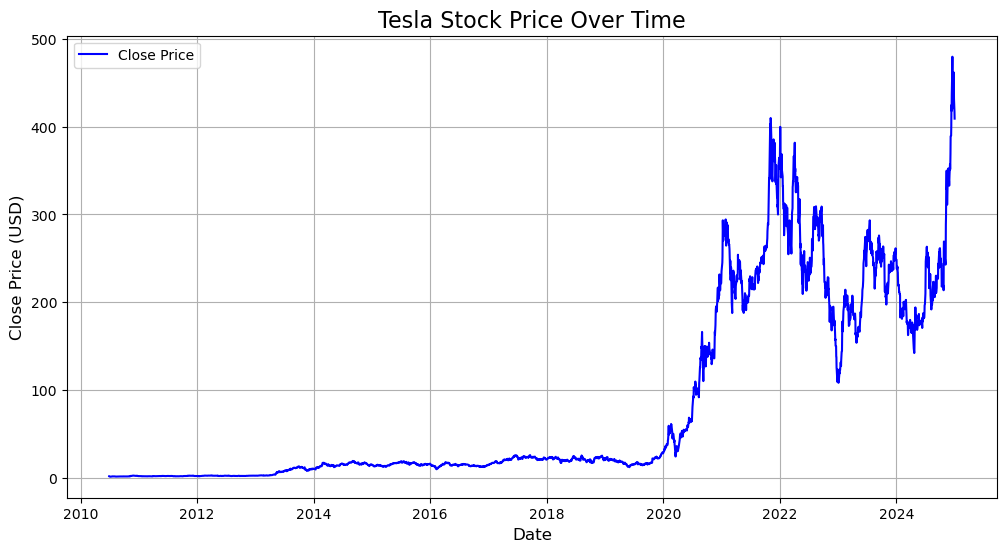

In [31]:
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar los datos de Tesla
tesla_data = yf.Ticker("TSLA")

# Obtener el historial de precios
tesla_data = tesla_data.history(period="max")

# Crear la función para graficar
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price (USD)', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

# Llamar a la función make_graph con el título
make_graph(tesla_data, "Tesla Stock Price Over Time")
